## Linear Regression with Hill Climbing 

y = 0.3285369163870731x + -1.5533371450287323
y = 0.5940105557027676x + -1.8490606144539878
y = 1.5340377729546786x + -1.9399935990706574
y = 4.147313875235616x + -2.338082551205806
y = 3.351472650985465x + -1.2272207200365064
y = 2.571711618781967x + 0.13694407709094225
y = 2.524566986916549x + 1.4062785560598465
y = 2.237584376334487x + 2.8140549906615675
y = 2.220300850686848x + 3.267170189488001
y = 2.1021380846554467x + 3.6243528314060054
y = 1.999638782374632x + 4.1851927087639895
y = 1.8786964281021383x + 5.076677822643499
y = 1.9216303976584033x + 4.769953935334109
y = 1.931199517358852x + 4.82451969679349
y = 1.942484867227472x + 4.735129196561618
y = 1.9390634512334397x + 4.719814787179514
y = 1.9376339221126344x + 4.747285309909694
y = 1.9376339221126295x + 4.747285309909694


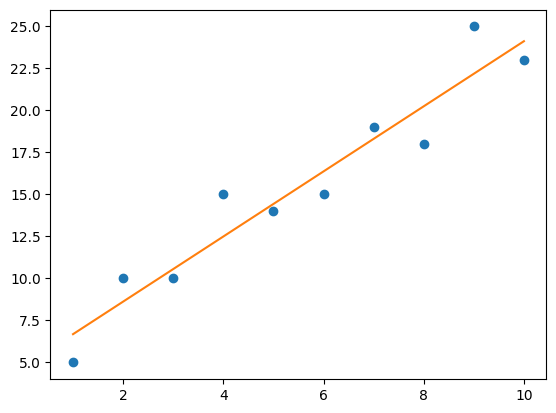

In [17]:
import numpy as np
import pandas as pd

data = pd.read_csv("https://bit.ly/2KF29Bd").values
x = data[:,0]
y = data[:,-1]

# Building the model
b = np.array([0.0, 0.0]) 

epochs = 150000  # The number of iterations to perform
n = float(data.shape[0])  # Number of points
best_loss = 10000000000000.0  # Initialize with a really large value

for i in range(epochs):

    # Randomly adjust "m" and "b"
    random_adj = np.random.normal(loc=0,scale=1,size=2)
    b += random_adj
    
    # Calculate loss, which is total sum squared error
    new_loss = ((y - (b[1] * x + b[0])) ** 2).sum()
    
    # If loss has improved, keep new values. Otherwise revert.
    if new_loss < best_loss:
        print("y = {0}x + {1}".format(b[1], b[0]))
        best_loss = new_loss
    else:
        b -= random_adj
        
print("y = {0}x + {1}".format(b[1], b[0]))


# plot 
import matplotlib.pyplot as plt
import numpy as np 
# show in chart

plt.plot(x, y, 'o') # scatterplot
plt.plot(x, b[1]*x + b[0]) # line
plt.show()


## Customer Queue Simulation

In [ ]:
import numpy as np
from numpy.random import normal, exponential

np.random.seed(0) # use random seed to run identical "random" simulations

mean_checkout_time = 3  # minutes
std_checkout_time = .5  # minutes
mean_arrival_rate = 20 / 60  # customers per minute
customer_ct = 100

# customer arrival times relative to the previous customer
customer_time_betweens = exponential(scale=1/mean_arrival_rate, size=customer_ct+2) # need to add 2 to prevent out-of-index errors

# customer arrival times as minutes since start of simulation
customer_arrival_times = np.cumsum(customer_time_betweens)

# customer checkout times
customer_checkout_times = normal(loc=mean_checkout_time, scale=std_checkout_time, size=customer_ct+2) # need to add 2 to prevent out-of-index errors

# start time at 0 but jump to first customer arrival, and track whether customer is being processed
# and which customers are waiting
current_time = customer_arrival_times[0]
waiting_customers = []

arrived_customer_i = 0
processing_customer_i = 0
processing_customer_start_time = customer_arrival_times[0]

# process customers but stop when all customers have arrived 
while arrived_customer_i < customer_ct:

    # arrival time of processing customer
    processing_cust_arr_tm = customer_arrival_times[processing_customer_i]

    # scheduled finish time of processing customer
    processing_cust_fin_tm = processing_customer_start_time + \
                             customer_checkout_times[processing_customer_i]

    # time of next customer arrival
    def next_cust_arr_tm(): return customer_arrival_times[arrived_customer_i+1]

    # CHECK WHICH EVENT OCCURRED BY MATCHING THE TIMES
    next_event_time = None

    # if the first customer
    if current_time == processing_customer_start_time:
        print(f"{current_time}: CUSTOMER {arrived_customer_i} ARRIVED, NO LINE, PROCESSING IMMEDIATELY")
        next_event_time = np.min([processing_cust_fin_tm, next_cust_arr_tm()])

    # if a customer arrives
    elif current_time == next_cust_arr_tm():
        arrived_customer_i +=1 # increment the arrived customer index

        # if there is no queue and the arriving customer is next
        if processing_customer_i == arrived_customer_i:
            processing_customer_start_time = current_time
            processing_cust_fin_tm = processing_customer_start_time + customer_checkout_times[processing_customer_i]

            print(f"{current_time}: CUSTOMER {arrived_customer_i} ARRIVED, NO LINE, PROCESSING IMMEDIATELY")
        # else there is a queue and the customer must wait in line
        else:
            waiting_customers.append(arrived_customer_i)
            print(f"{current_time}: CUSTOMER {arrived_customer_i} ARRIVED, ADDING TO LINE {waiting_customers}")

        # schedule next event time to be the processing customer finishing or the next customer arrival
        next_event_time = np.min([processing_cust_fin_tm, next_cust_arr_tm()])

    # if a customer finishes processing
    elif current_time == processing_cust_fin_tm:

        # if queue is not empty, take customer out of queue
        if waiting_customers:
            waiting_customers.pop(0)
            print(f"{current_time}: CUSTOMER {processing_customer_i} FINISHED, CUSTOMER {processing_customer_i + 1}"
                  f" REMOVED FROM LINE {waiting_customers}")

            processing_customer_start_time = current_time

            # next event is this customer finishing or the next customer arrival
            next_event_time = np.min([processing_customer_start_time + customer_checkout_times[processing_customer_i +1],
                                      next_cust_arr_tm()])

        else:
            # if the queue is empty, wait for next customer 
            print(f"{current_time}: CUSTOMER {processing_customer_i} FINISHED, WAITING FOR CUSTOMER {processing_customer_i+1}")
            next_event_time = next_cust_arr_tm()

        processing_customer_i += 1 # process next customer

    # move forward to next event
    current_time = next_event_time

## Neural Network Forward Propagation 